**Training dataset from 0-9 images using transfer learning with different models with train-90% test-10% split**

In [1]:
!pip install fastai wwf -q --upgrade

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [ ]:
!unzip "/content/drive/MyDrive/iiitdelhi2/task 2.zip"

In [4]:
path = Path('/content/task 2')

In [5]:
np.random.seed(6)

dataset = DataBlock(blocks = (ImageBlock,CategoryBlock),
                    #loading all images
                  get_items = get_image_files,
                  # dividing the dataset randomly into train=90% test=10%
                  splitter = TrainTestSplitter(test_size=0.1),
                  # getting label from folder name
                  get_y = parent_label,
                  #transforming image size = 64
                  item_tfms=Resize(64),
                  #applying augmentation
                  batch_tfms=aug_transforms(do_flip=False, flip_vert=False, max_rotate=10.0, min_zoom=1.0,
                                            max_zoom=1.1, max_lighting=0.2, max_warp=0.2, 
                                            p_affine=0.75, p_lighting=0.75,pad_mode='reflection', min_scale=1.0))

In [6]:
dls = dataset.dataloaders(path)

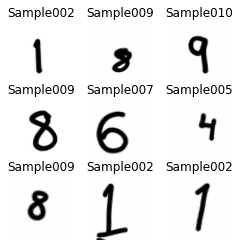

In [8]:
dls.show_batch(max_n=9, figsize=(4,4))

In [7]:
#loading resnet34 dataset with pretrained weights=True
learn = cnn_learner(dls, resnet34,pretrained=True, metrics=[error_rate,accuracy])

In [9]:
#fine tuning the resnet34 model previously trained on imagenet dataset
learn.fine_tune(10, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.894235,2.642372,0.825000,0.175000,00:07


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.536230,2.041153,0.625000,0.375000,00:06
1,2.250247,1.591965,0.450000,0.550000,00:06
2,1.911506,1.170117,0.375000,0.625000,00:06
3,1.606576,1.047631,0.300000,0.700000,00:06
4,1.333244,1.018297,0.250000,0.750000,00:06
5,1.160980,0.802041,0.200000,0.800000,00:06
6,1.036609,0.689117,0.150000,0.850000,00:06
7,0.924233,0.611086,0.150000,0.850000,00:06
8,0.840194,0.509987,0.175000,0.825000,00:06
9,0.761831,0.475448,0.150000,0.850000,00:06


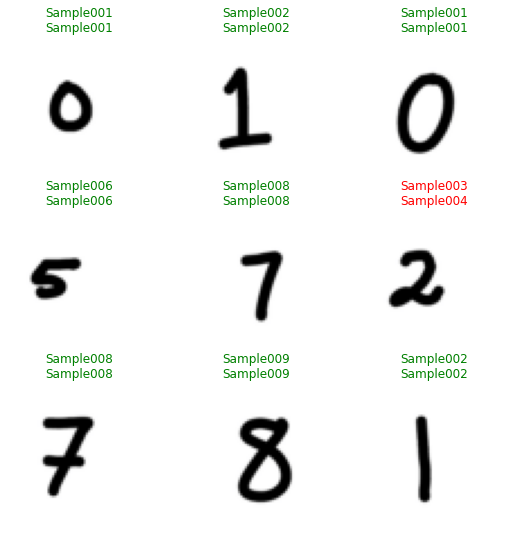

In [10]:
learn.show_results()

In [12]:
learn.save('model2-resnet34')
learn.export(fname='model2-resnet34.pkl')

Path('models/model2-resnet34.pth')

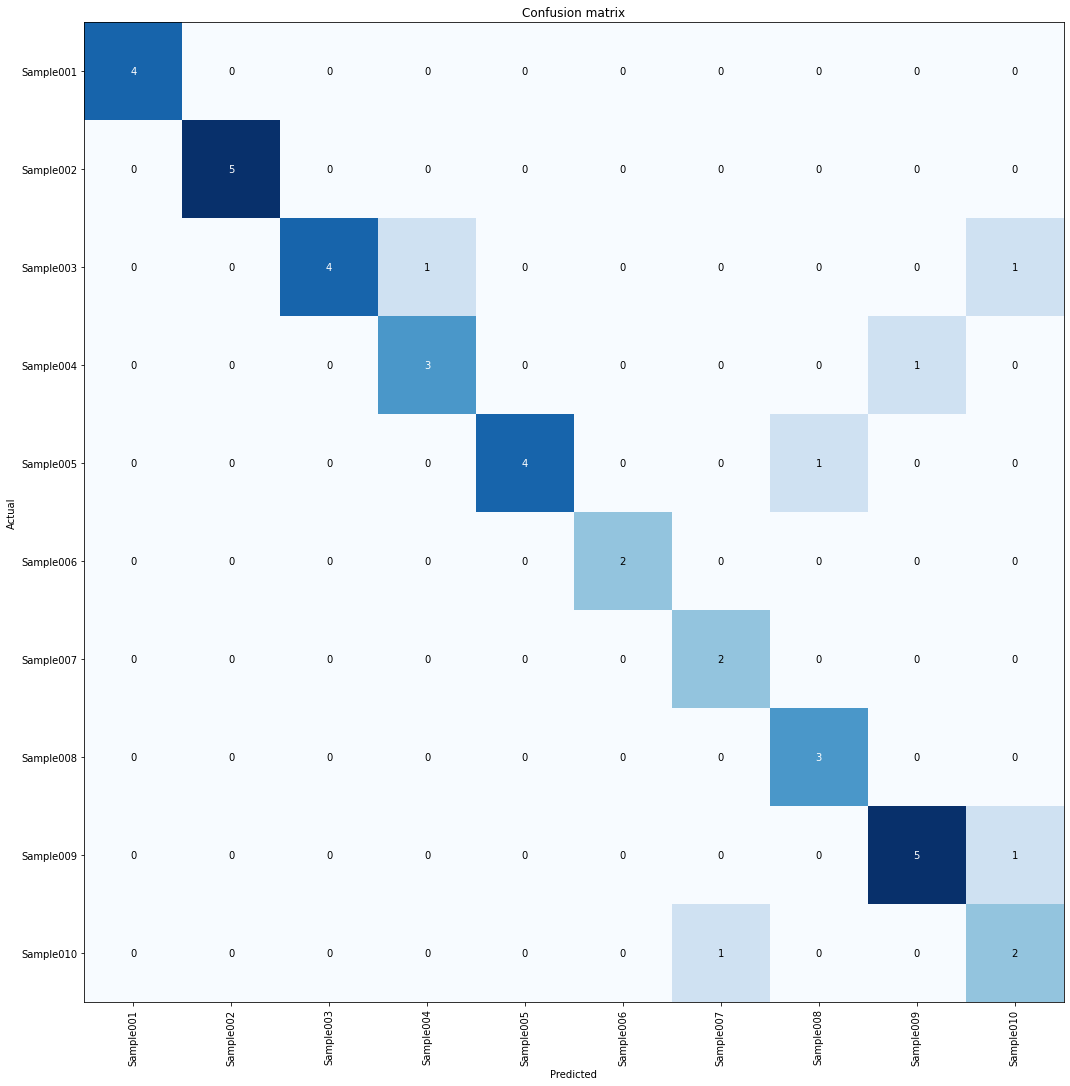

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(15,15))

In [12]:
#loading resnet50 dataset with pretrained weights=True
learn = cnn_learner(dls, resnet50,pretrained=True, metrics=[error_rate,accuracy])

In [13]:
#fine tuning the resnet50 model previously trained on imagenet dataset
learn.fine_tune(10, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.012893,2.531874,0.675000,0.325000,00:07


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.576290,1.841351,0.475000,0.525000,00:06
1,1.429344,1.094982,0.350000,0.650000,00:06
2,1.240624,0.906306,0.300000,0.700000,00:06
3,1.085266,0.472390,0.175000,0.825000,00:06
4,0.962667,0.380493,0.100000,0.900000,00:06
5,0.836553,0.463917,0.150000,0.850000,00:06
6,0.750114,0.397005,0.150000,0.850000,00:06
7,0.679585,0.397028,0.150000,0.850000,00:06
8,0.640105,0.386219,0.150000,0.850000,00:06
9,0.583361,0.382276,0.150000,0.850000,00:06


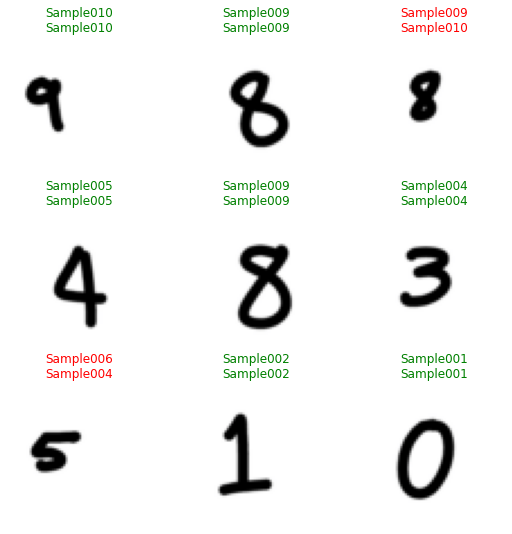

In [14]:
learn.show_results()

In [20]:
learn.save('model2-resnet50')

Path('models/model2-resnet50.pth')

In [21]:
learn.export(fname='model2-resnet50.pkl')

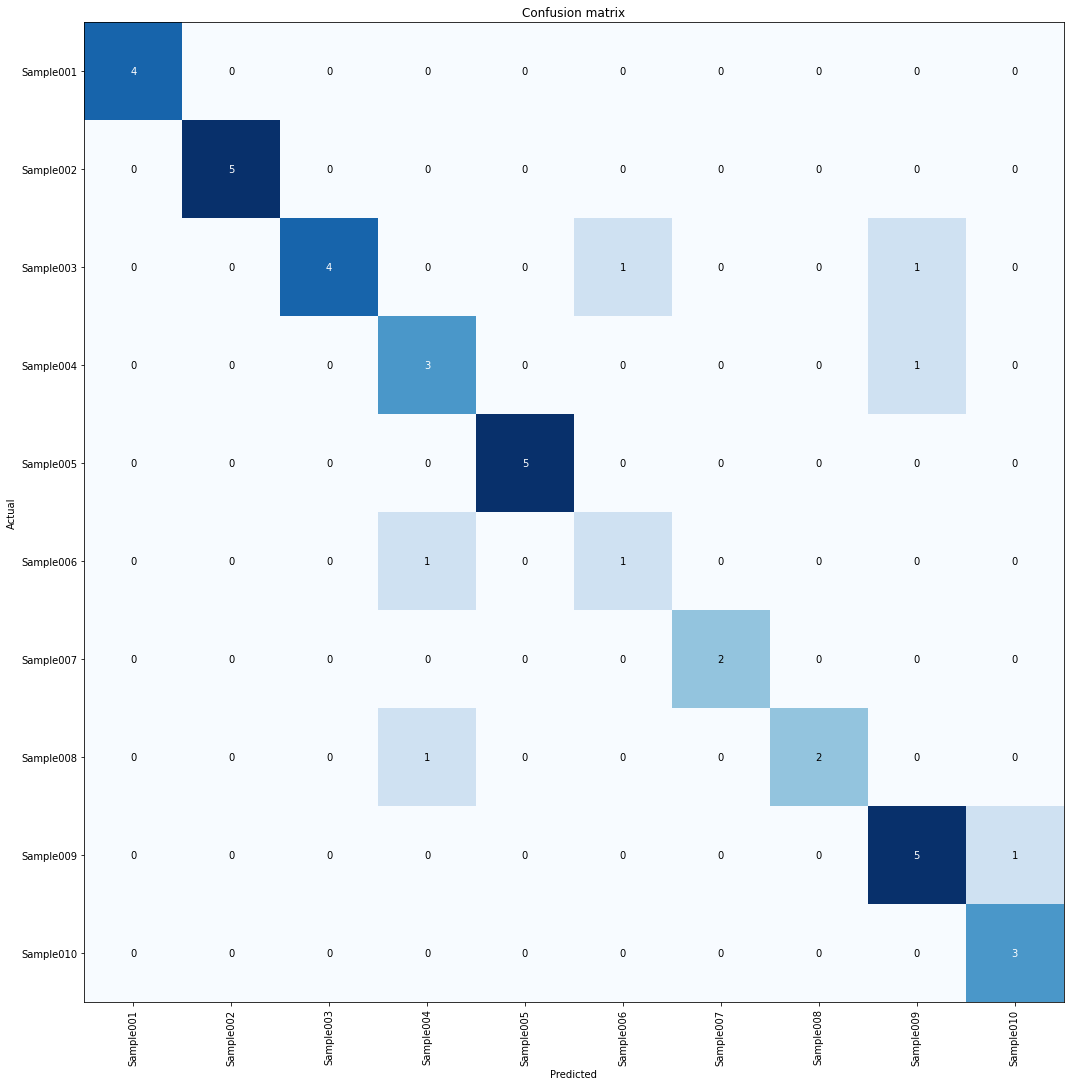

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(15,15))

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.005248074419796467)

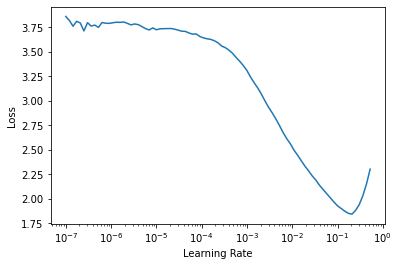

In [16]:
#loading vgg16_bn dataset with pretrained weights=True
learn = cnn_learner(dls, vgg16_bn,pretrained=True, metrics=[error_rate,accuracy])
#finding learning rate
learn.lr_find()

In [17]:
#fine tuning the vgg16_bn model previously trained on imagenet dataset
learn.fit(10, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.275255,1.954611,0.700000,0.300000,00:07
1,1.561112,1.512337,0.550000,0.450000,00:06
2,1.223367,1.151068,0.275000,0.725000,00:06
3,1.014007,0.916866,0.150000,0.850000,00:06
4,0.848448,0.878510,0.125000,0.875000,00:06
5,0.720944,0.740574,0.125000,0.875000,00:06
6,0.632113,0.545419,0.100000,0.900000,00:06
7,0.562256,0.508698,0.050000,0.950000,00:06
8,0.492270,0.481132,0.075000,0.925000,00:06
9,0.447501,0.431349,0.075000,0.925000,00:06


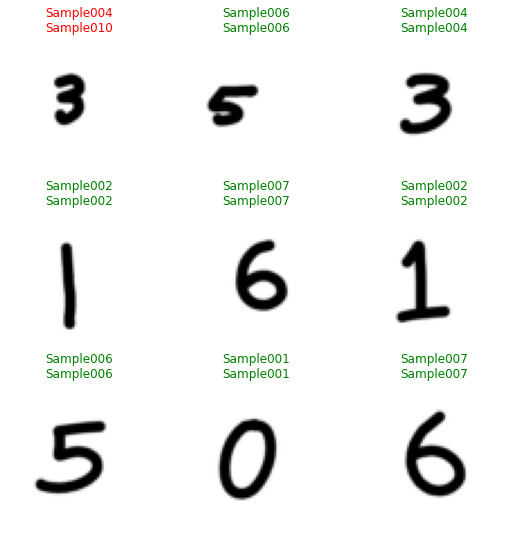

In [18]:
learn.show_results()

In [27]:
learn.save('model2-vgg16')
learn.export(fname='model2-vgg16.pkl')

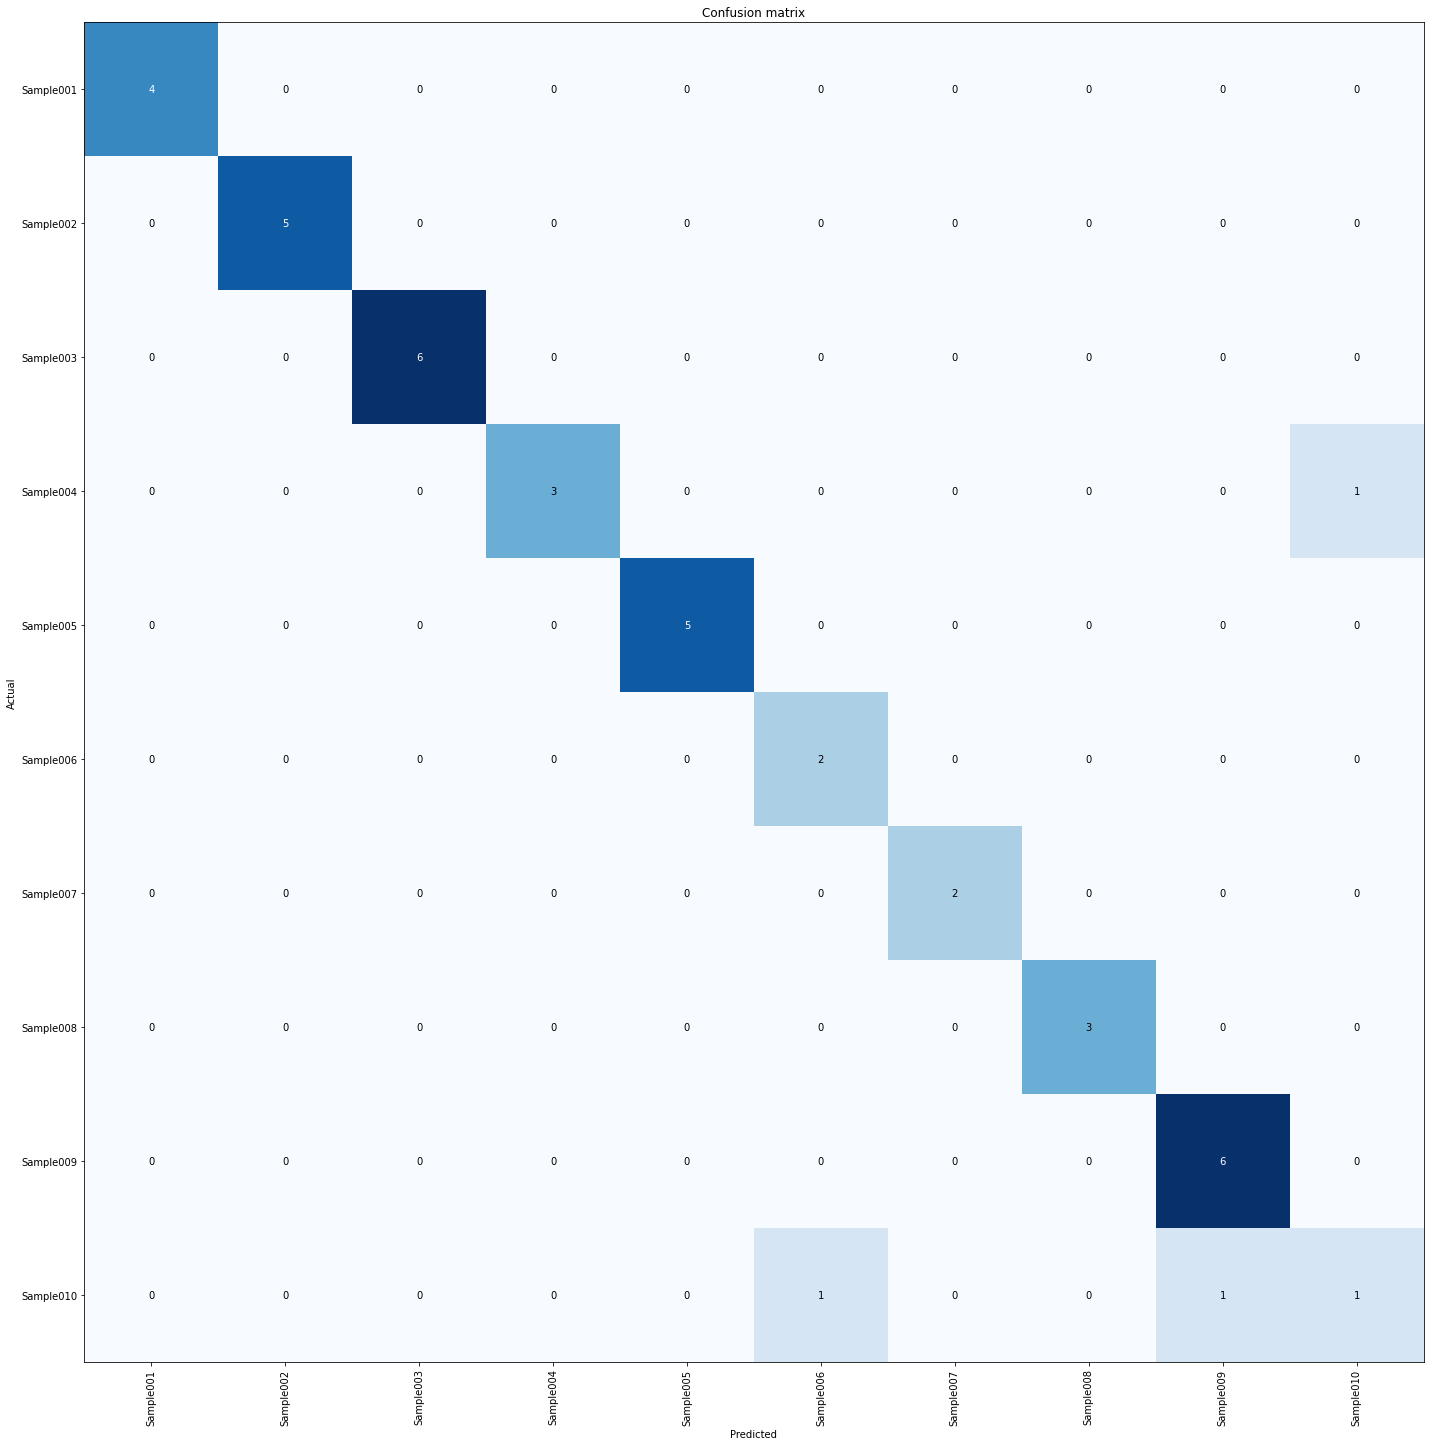

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(20,20))